In [0]:
# Filter the uneccesary warnings
import warnings
warnings.filterwarnings("ignore")

# Import pandas and numpy
import pandas as pd
import numpy as np

# Fix the random seed
np.random.seed(7)

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/sayakpaul/Phishing-Websites-Detection/master/Phishing.csv')
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
having_IP_Address,-1,1,1,1,1,-1,1,1,1,1
URL_Length,1,1,0,0,0,0,0,0,0,1
Shortining_Service,1,1,1,1,-1,-1,-1,1,-1,-1
having_At_Symbol,1,1,1,1,1,1,1,1,1,1
double_slash_redirecting,-1,1,1,1,1,-1,1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1,1,-1,-1,1,-1
SSLfinal_State,-1,1,-1,-1,1,1,-1,-1,1,1
Domain_registeration_length,-1,-1,-1,1,-1,-1,1,1,-1,-1
Favicon,1,1,1,1,1,1,1,1,1,1


In [0]:
# Data columns
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [0]:
from collections import Counter

classes = Counter(data['Result'].values)
classes.most_common()

[(1, 6157), (-1, 4898)]

In [0]:
class_dist = pd.DataFrame(classes.most_common(), columns=['Class', 'Num_Observations'])
class_dist

,Class,Num_Observations
0,1,6157
1,-1,4898


In [0]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


Mapping the -1 labels to 0. 

In [5]:
data.rename(columns={'Result': 'Class'}, inplace=True)

data['Class'] = data['Class'].map({-1:0, 1:1})
data['Class'].unique()

array([0, 1])

In [0]:
for col in data.columns:
    data[col] = data[col].astype('category')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
having_IP_Address              11055 non-null category
URL_Length                     11055 non-null category
Shortining_Service             11055 non-null category
having_At_Symbol               11055 non-null category
double_slash_redirecting       11055 non-null category
Prefix_Suffix                  11055 non-null category
having_Sub_Domain              11055 non-null category
SSLfinal_State                 11055 non-null category
Domain_registeration_length    11055 non-null category
Favicon                        11055 non-null category
port                           11055 non-null category
HTTPS_token                    11055 non-null category
Request_URL                    11055 non-null category
URL_of_Anchor                  11055 non-null category
Links_in_tags                  11055 non-null category
SFH                            11055 non-null category
Submitting_

In [0]:
!mkdir data

In [0]:
data.to_csv('data/Phishing.csv', index=False)

In [0]:
from fastai.tabular import * 

In [0]:
procs = [Categorify]
valid_idx = range(len(data)-2211, len(data))
dep_var = 'Class'
cat_names = data.columns[:-1]

In [10]:
path = Path('content/data')
databunch = TabularDataBunch.from_df(path, data, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names, bs=10)
print(databunch.train_ds.cat_names) 

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report'],
      dtype='object')


In [17]:
databunch.label_list

LabelLists;

Train: LabelList (8844 items)
x: TabularList
having_IP_Address -1; URL_Length 1; Shortining_Service 1; having_At_Symbol 1; double_slash_redirecting -1; Prefix_Suffix -1; having_Sub_Domain -1; SSLfinal_State -1; Domain_registeration_length -1; Favicon 1; port 1; HTTPS_token -1; Request_URL 1; URL_of_Anchor -1; Links_in_tags 1; SFH -1; Submitting_to_email -1; Abnormal_URL -1; Redirect 0; on_mouseover 1; RightClick 1; popUpWidnow 1; Iframe 1; age_of_domain -1; DNSRecord -1; web_traffic -1; Page_Rank -1; Google_Index 1; Links_pointing_to_page 1; Statistical_report -1; ,having_IP_Address 1; URL_Length 1; Shortining_Service 1; having_At_Symbol 1; double_slash_redirecting 1; Prefix_Suffix -1; having_Sub_Domain 0; SSLfinal_State 1; Domain_registeration_length -1; Favicon 1; port 1; HTTPS_token -1; Request_URL 1; URL_of_Anchor 0; Links_in_tags -1; SFH -1; Submitting_to_email 1; Abnormal_URL 1; Redirect 0; on_mouseover 1; RightClick 1; popUpWidnow 1; Iframe 1; age_of_domain -1; DNSR

In [18]:
def emb_sz_rule(n_cat:int)->int: return min(600, round(1.6 * n_cat**0.56))
emb_sz_rule(30)

11

In [0]:
embedding_dict = {}

for column in data.columns[:-1]:
  embedding_dict[column] = 11

In [25]:
learn = tabular_learner(databunch, layers=[200,100], emb_szs=embedding_dict, metrics=accuracy)
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.235874,0.253502,0.889643,00:10
1,0.220044,0.195389,0.929896,00:11
2,0.180829,0.203281,0.925825,00:10
3,0.144848,0.230486,0.933514,00:12
4,0.139055,0.167894,0.933062,00:10


In [0]:
learn.save('stage-1')

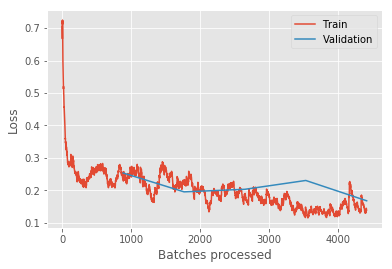

In [27]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

learn.recorder.plot_losses()

In [22]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(3, 11)
    (1): Embedding(4, 11)
    (2): Embedding(3, 11)
    (3): Embedding(3, 11)
    (4): Embedding(3, 11)
    (5): Embedding(3, 11)
    (6): Embedding(4, 11)
    (7): Embedding(4, 11)
    (8): Embedding(3, 11)
    (9): Embedding(3, 11)
    (10): Embedding(3, 11)
    (11): Embedding(3, 11)
    (12): Embedding(3, 11)
    (13): Embedding(4, 11)
    (14): Embedding(4, 11)
    (15): Embedding(4, 11)
    (16): Embedding(3, 11)
    (17): Embedding(3, 11)
    (18): Embedding(3, 11)
    (19): Embedding(3, 11)
    (20): Embedding(3, 11)
    (21): Embedding(3, 11)
    (22): Embedding(3, 11)
    (23): Embedding(3, 11)
    (24): Embedding(3, 11)
    (25): Embedding(4, 11)
    (26): Embedding(3, 11)
    (27): Embedding(3, 11)
    (28): Embedding(4, 11)
    (29): Embedding(3, 11)
  )
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Line

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


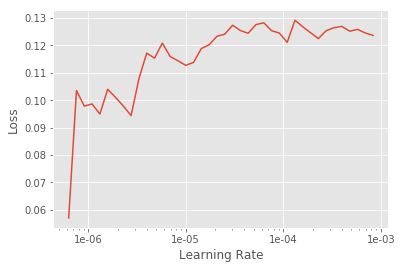

In [29]:
learn.lr_find();
learn.recorder.plot()


In [36]:
learn.load('stage-1')
learn.fit_one_cycle(5, 1.5*1e-06)

epoch,train_loss,valid_loss,accuracy,time
0,0.148217,0.176690,0.928087,00:11
1,0.127078,0.173688,0.928991,00:11
2,0.160250,0.172248,0.928087,00:11
3,0.162649,0.195290,0.925373,00:11
4,0.113820,0.176578,0.927635,00:10


In [37]:
learn.load('stage-1')
learn.fit(5, 1.5*1e-06)

epoch,train_loss,valid_loss,accuracy,time
0,0.159023,0.176422,0.927635,00:10
1,0.150491,0.165265,0.933967,00:10
2,0.138136,0.170437,0.933062,00:10
3,0.146531,0.185920,0.926278,00:10
4,0.146488,0.197861,0.921303,00:11


In [17]:
databunch = TabularDataBunch.from_df(path, data, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names, bs=32)
learn = tabular_learner(databunch, layers=[200,100], emb_szs=embedding_dict, metrics=accuracy).to_fp16()
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.206088,0.186887,0.921303,00:04
1,0.154100,0.184212,0.926730,00:04
2,0.140966,0.216007,0.916780,00:04
3,0.123015,0.162843,0.938942,00:04
4,0.123534,0.173642,0.917684,00:05


In [0]:
learn.save('stage-2')

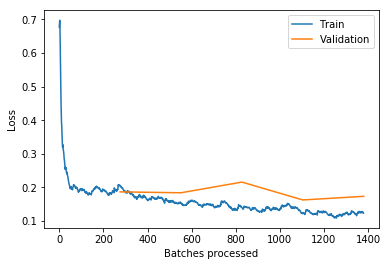

In [19]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


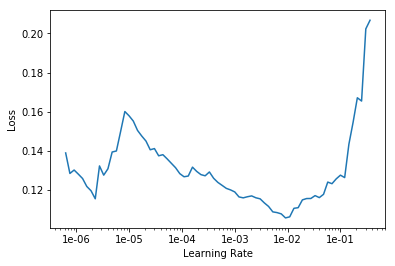

In [20]:
learn.lr_find()
learn.recorder.plot()

In [27]:
learn.load('stage-2')
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.112382,0.185257,0.923112,00:04
1,0.100710,0.180946,0.921755,00:04
2,0.103667,0.166621,0.927182,00:04
3,0.089619,0.152128,0.936680,00:04
4,0.088446,0.172709,0.933514,00:04


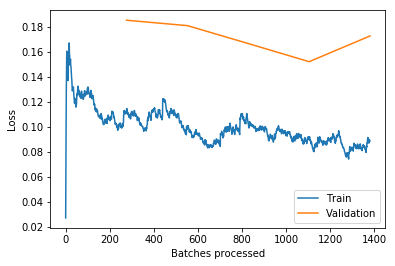

In [28]:
learn.recorder.plot_losses()

In [55]:
databunch = TabularDataBunch.from_df(path, data, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names, bs=64)
learn = tabular_learner(databunch, layers=[300,150], emb_szs=embedding_dict, metrics=accuracy).to_fp16()
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.158269,0.167228,0.925373,00:02
1,0.153388,0.167898,0.933967,00:02
2,0.137706,0.202665,0.926278,00:02
3,0.131929,0.153038,0.936228,00:02
4,0.114318,0.135939,0.937585,00:02


In [0]:
learn.save('stage-3')

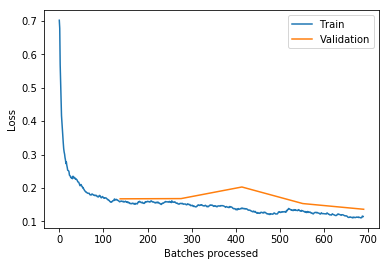

In [56]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


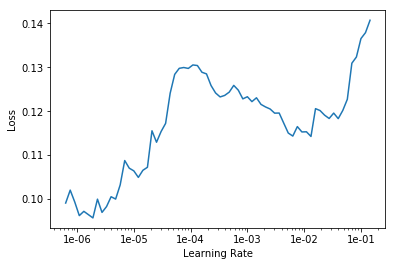

In [40]:
learn.lr_find()
learn.recorder.plot()

In [41]:
learn.load('stage-3')
learn.fit(5, 1e-04)

epoch,train_loss,valid_loss,accuracy,time
0,0.095814,0.145458,0.935776,00:02
1,0.092159,0.139997,0.936680,00:02
2,0.085358,0.142936,0.937585,00:02
3,0.078285,0.138763,0.939846,00:02
4,0.079426,0.140977,0.939394,00:02


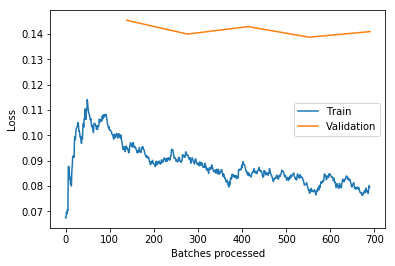

In [42]:
learn.recorder.plot_losses()

In [57]:
learn.load('stage-3')
learn.fit(10, 1e-04, 0.6)

epoch,train_loss,valid_loss,accuracy,time
0,0.099098,0.149151,0.932610,00:02
1,0.090199,0.145723,0.934419,00:02
2,0.089418,0.143439,0.936680,00:02
3,0.082492,0.139634,0.936680,00:02
4,0.077620,0.140658,0.939394,00:02
5,0.080575,0.135422,0.938037,00:02
6,0.070920,0.138414,0.937585,00:02
7,0.072288,0.141489,0.934419,00:02
8,0.076184,0.136850,0.942560,00:02
9,0.072719,0.139091,0.940298,00:02


In [0]:
learn.save('stage-4')

In [60]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-04, wd=0.6)

epoch,train_loss,valid_loss,accuracy,time
0,0.070832,0.142825,0.938942,00:02
1,0.067276,0.136672,0.940298,00:02
2,0.071374,0.139362,0.941203,00:02
3,0.068225,0.142303,0.939846,00:02
4,0.069698,0.137403,0.934871,00:02
5,0.061990,0.138733,0.938489,00:02
6,0.063320,0.143927,0.939394,00:02
7,0.064499,0.142344,0.942108,00:02
8,0.056307,0.144487,0.940298,00:02
9,0.062314,0.140876,0.943012,00:02


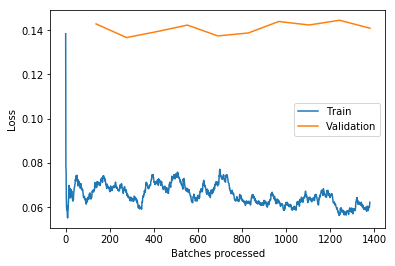

In [63]:
learn.recorder.plot_losses()

In [0]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

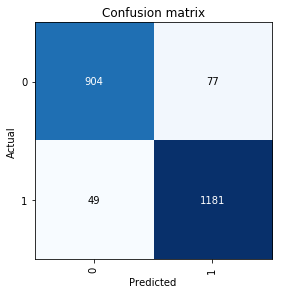

In [66]:
interp.plot_confusion_matrix()

- 0 corresponds to phishing webistes
- 1 corresponds to normal websites